In [1]:
import seaborn as sns
import pandas as pd

In [2]:
marriages_df = pd.read_csv('marriages.csv')

In [3]:
marriages_df.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,C01940V02373,Form of Ceremony,UNIT,VALUE
0,VSB02C01,Age of Older Partner,2016,2016,355,Under 20 years,1,Male,-,All ceremonies,Number,0.0
1,VSB02C01,Age of Older Partner,2016,2016,355,Under 20 years,1,Male,7,Other religious denominations,Number,0.0
2,VSB02C01,Age of Older Partner,2016,2016,355,Under 20 years,1,Male,8,Civil marriages,Number,0.0
3,VSB02C01,Age of Older Partner,2016,2016,355,Under 20 years,1,Male,9,The Humanist Association,Number,0.0
4,VSB02C01,Age of Older Partner,2016,2016,355,Under 20 years,1,Male,10,The Spiritualist Union of Ireland,Number,0.0


In [4]:
marriages_df.shape

(1540, 12)

In [5]:
marriages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATISTIC         1540 non-null   object 
 1   Statistic Label   1540 non-null   object 
 2   TLIST(A1)         1540 non-null   int64  
 3   Year              1540 non-null   int64  
 4   C02076V02508      1540 non-null   object 
 5   Age Group         1540 non-null   object 
 6   C02199V02655      1540 non-null   int64  
 7   Sex               1540 non-null   object 
 8   C01940V02373      1540 non-null   object 
 9   Form of Ceremony  1540 non-null   object 
 10  UNIT              1540 non-null   object 
 11  VALUE             1354 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 144.5+ KB


In [6]:
marriages_df.drop(marriages_df[marriages_df['Age Group'] != 'All ages'].index, axis=0, inplace=True)

In [7]:
marriages_df.head()


,STATISTIC,Statistic Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,C01940V02373,Form of Ceremony,UNIT,VALUE
100,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,-,All ceremonies,Number,606.0
101,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,7,Other religious denominations,Number,20.0
102,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,8,Civil marriages,Number,490.0
103,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,9,The Humanist Association,Number,60.0
104,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,10,The Spiritualist Union of Ireland,Number,36.0


In [8]:
marriages_df.drop(marriages_df[marriages_df['Form of Ceremony'] == 'All ceremonies'].index, axis=0, inplace=True)

In [9]:
marriages_df

,STATISTIC,Statistic Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,C01940V02373,Form of Ceremony,UNIT,VALUE
101,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,7,Other religious denominations,Number,20.0
102,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,8,Civil marriages,Number,490.0
103,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,9,The Humanist Association,Number,60.0
104,VSB02C01,Age of Older Partner,2016,2016,-,All ages,1,Male,10,The Spiritualist Union of Ireland,Number,36.0
106,VSB02C01,Age of Older Partner,2016,2016,-,All ages,2,Female,7,Other religious denominations,Number,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1534,VSB02C02,Age of Younger Partner,2022,2022,-,All ages,1,Male,10,The Spiritualist Union of Ireland,Number,36.0
1536,VSB02C02,Age of Younger Partner,2022,2022,-,All ages,2,Female,7,Other religious denominations,Number,53.0
1537,VSB02C02,Age of Younger Partner,2022,2022,-,All ages,2,Female,8,Civil marriages,Number,149.0
1538,VSB02C02,Age of Younger Partner,2022,2022,-,All ages,2,Female,9,The Humanist Association,Number,48.0


In [10]:
marriages_df.drop(columns=['Age Group'], inplace=True)

In [11]:
print(marriages_df.columns)


Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02076V02508',
       'C02199V02655', 'Sex', 'C01940V02373', 'Form of Ceremony', 'UNIT',
       'VALUE'],
      dtype='object')


In [12]:
marriages_df.drop('C02076V02508', axis=1, inplace=True)

In [13]:
marriages_df.drop('TLIST(A1)', axis=1, inplace=True)

In [14]:
marriages_df.drop('C02199V02655', axis=1, inplace=True)

In [15]:
marriages_df.drop('C01940V02373', axis=1, inplace=True)

In [16]:
marriages_df.drop('UNIT', axis=1, inplace=True)

In [17]:
marriages_df.drop('STATISTIC', axis=1, inplace=True)

In [18]:
marriages_df.drop('Statistic Label', axis=1, inplace=True)

In [19]:
marriages_df

,Year,Sex,Form of Ceremony,VALUE
101,2016,Male,Other religious denominations,20.0
102,2016,Male,Civil marriages,490.0
103,2016,Male,The Humanist Association,60.0
104,2016,Male,The Spiritualist Union of Ireland,36.0
106,2016,Female,Other religious denominations,16.0
...,...,...,...,...
1534,2022,Male,The Spiritualist Union of Ireland,36.0
1536,2022,Female,Other religious denominations,53.0
1537,2022,Female,Civil marriages,149.0
1538,2022,Female,The Humanist Association,48.0


In [20]:
marriages_df.describe(include=object)

,Sex,Form of Ceremony
count,112,112
unique,2,4
top,Male,Other religious denominations
freq,56,28


In [21]:
import numpy as np

In [22]:
marriages_df.isnull().sum()

Year                0
Sex                 0
Form of Ceremony    0
VALUE               0
dtype: int64

In [23]:
marriages_df.shape

(112, 4)

In [24]:
marriages_df = marriages_df.rename(columns={"VALUE": 'Total' })

In [25]:
marriages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 101 to 1539
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              112 non-null    int64  
 1   Sex               112 non-null    object 
 2   Form of Ceremony  112 non-null    object 
 3   Total             112 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.4+ KB


In [26]:
marriages_df.count() 

Year                112
Sex                 112
Form of Ceremony    112
Total               112
dtype: int64

In [27]:
duplicate_rows_df = marriages_df[marriages_df.duplicated()]
print("Duplicated rows: ", duplicate_rows_df.shape)

Duplicated rows:  (56, 4)


In [28]:
marriages_df = marriages_df.drop_duplicates()
marriages_df

,Year,Sex,Form of Ceremony,Total
101,2016,Male,Other religious denominations,20.0
102,2016,Male,Civil marriages,490.0
103,2016,Male,The Humanist Association,60.0
104,2016,Male,The Spiritualist Union of Ireland,36.0
106,2016,Female,Other religious denominations,16.0
107,2016,Female,Civil marriages,360.0
108,2016,Female,The Humanist Association,37.0
109,2016,Female,The Spiritualist Union of Ireland,37.0
211,2017,Male,Other religious denominations,27.0
212,2017,Male,Civil marriages,298.0


In [29]:
marriages_df['totalMarriages'] = 0

for year in range(2016, 2023):
    maleSum = (marriages_df['Year'] == year) & (marriages_df['Sex'] == 'Male')
    femaleSum = (marriages_df['Year'] == year) & (marriages_df['Sex'] == 'Female')
    

    if maleSum.any():
        maleSumOperation = marriages_df[maleSum]['Total'].sum()
        marriages_df.loc[maleSum, 'totalMarriages'] = maleSumOperation

    if femaleSum.any():
        femaleSumOperation = marriages_df[femaleSum]['Total'].sum()
        marriages_df.loc[femaleSum, 'totalMarriages'] = femaleSumOperation


In [30]:
marriages_df['Form of Ceremony'].unique()

array(['Other religious denominations', 'Civil marriages',
       'The Humanist Association', 'The Spiritualist Union of Ireland'],
      dtype=object)

In [31]:
marriages_df['totalTypeOfCeremony'] = 0

for year in range(2016, 2023):
    maleOtherCeremonySum =  (marriages_df['Sex'] == 'Male')& (marriages_df['Form of Ceremony'] == 'Other religious denominations')
    femaleOtherCeremonySum = (marriages_df['Sex'] == 'Female')& (marriages_df['Form of Ceremony'] == 'Other religious denominations')
    
    maleCivilCeremonySum =  (marriages_df['Sex'] == 'Male')& (marriages_df['Form of Ceremony'] == 'Civil marriages')
    femaleCivilCeremonySum = (marriages_df['Sex'] == 'Female')& (marriages_df['Form of Ceremony'] == 'Civil marriages')
    
    maleHumanistCeremonySum = (marriages_df['Sex'] == 'Male')& (marriages_df['Form of Ceremony'] == 'The Humanist Association')
    femaleHumanistCeremonySum =  (marriages_df['Sex'] == 'Female')& (marriages_df['Form of Ceremony'] == 'The Humanist Association')
    
    maleSpiritualCeremonySum = (marriages_df['Sex'] == 'Male')& (marriages_df['Form of Ceremony'] == 'The Spiritualist Union of Ireland')
    femaleSpiritualCeremonySum =  (marriages_df['Sex'] == 'Female')& (marriages_df['Form of Ceremony'] == 'The Spiritualist Union of Ireland')

    if maleOtherCeremonySum.any():
        maleCeremonySumOperation = marriages_df[maleOtherCeremonySum]['Total'].sum()
        marriages_df.loc[maleOtherCeremonySum, 'totalTypeOfCeremony'] = maleCeremonySumOperation

    if femaleOtherCeremonySum.any():
        femaleCeremonySumOperation = marriages_df[femaleOtherCeremonySum]['Total'].sum()
        marriages_df.loc[femaleOtherCeremonySum, 'totalTypeOfCeremony'] = femaleCeremonySumOperation
        
    if maleCivilCeremonySum.any():
        maleCeremonySumOperation = marriages_df[maleCivilCeremonySum]['Total'].sum()
        marriages_df.loc[maleCivilCeremonySum, 'totalTypeOfCeremony'] = maleCeremonySumOperation
    
    if femaleCivilCeremonySum.any():
        femaleCeremonySumOperation = marriages_df[femaleCivilCeremonySum]['Total'].sum()
        marriages_df.loc[femaleCivilCeremonySum, 'totalTypeOfCeremony'] = femaleCeremonySumOperation
    
    if maleHumanistCeremonySum.any():
        maleCeremonySumOperation = marriages_df[maleHumanistCeremonySum]['Total'].sum()
        marriages_df.loc[maleHumanistCeremonySum, 'totalTypeOfCeremony'] = maleCeremonySumOperation
    
    if femaleHumanistCeremonySum.any():
        femaleCeremonySumOperation = marriages_df[femaleHumanistCeremonySum]['Total'].sum()
        marriages_df.loc[femaleHumanistCeremonySum, 'totalTypeOfCeremony'] = femaleCeremonySumOperation
    
    if maleSpiritualCeremonySum.any():
        maleCeremonySumOperation = marriages_df[maleSpiritualCeremonySum]['Total'].sum()
        marriages_df.loc[maleSpiritualCeremonySum, 'totalTypeOfCeremony'] = maleCeremonySumOperation
     
    if femaleSpiritualCeremonySum.any():
        femaleCeremonySumOperation = marriages_df[femaleSpiritualCeremonySum]['Total'].sum()
        marriages_df.loc[femaleSpiritualCeremonySum, 'totalTypeOfCeremony'] = femaleCeremonySumOperation

In [32]:
marriages_df.head()

,Year,Sex,Form of Ceremony,Total,totalMarriages,totalTypeOfCeremony
101,2016,Male,Other religious denominations,20.0,606,167
102,2016,Male,Civil marriages,490.0,606,1728
103,2016,Male,The Humanist Association,60.0,606,349
104,2016,Male,The Spiritualist Union of Ireland,36.0,606,238
106,2016,Female,Other religious denominations,16.0,450,164


<Axes: xlabel='totalMarriages', ylabel='Year'>

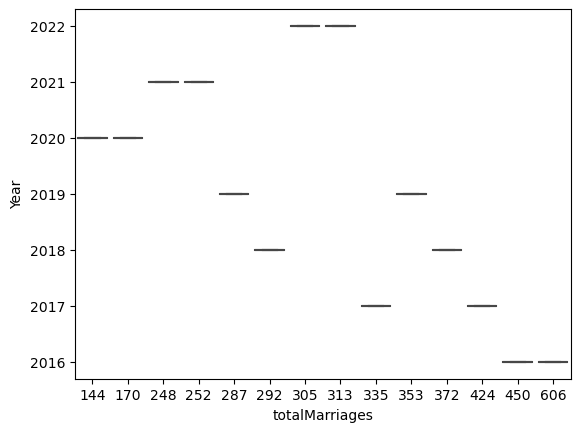

In [33]:
sns.boxplot(data=marriages_df, x='totalMarriages', y='Year')

<Axes: xlabel='totalTypeOfCeremony', ylabel='Total'>

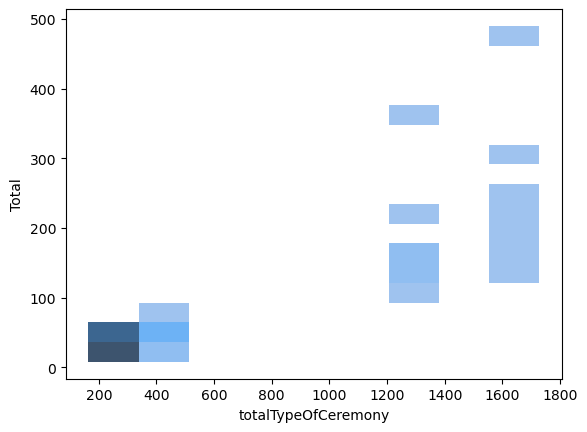

In [34]:
sns.histplot(data=marriages_df, x='totalTypeOfCeremony', y='Total')

In [35]:
from numpy import mean

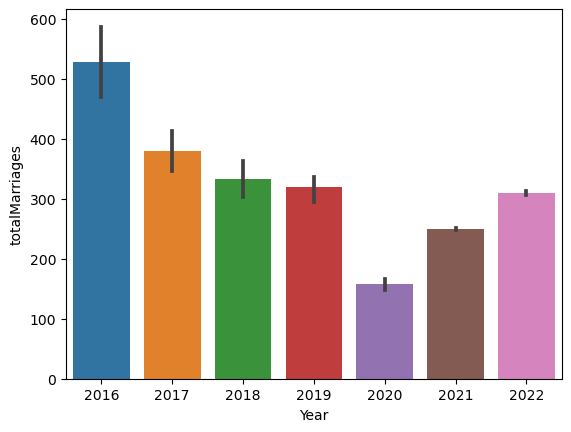

In [36]:
ax= sns.barplot (x='Year', y='totalMarriages', data=marriages_df, estimator = mean)

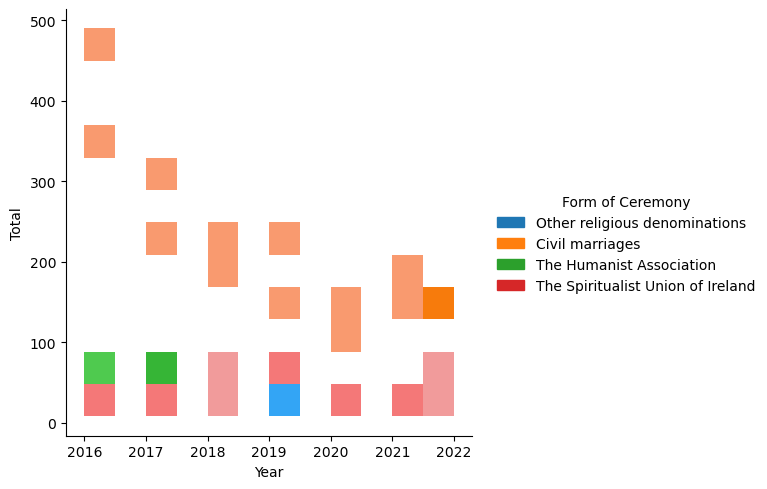

In [37]:
sns.displot(marriages_df, x='Year', y='Total', hue='Form of Ceremony', bins=12)

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Form of Ceremony')

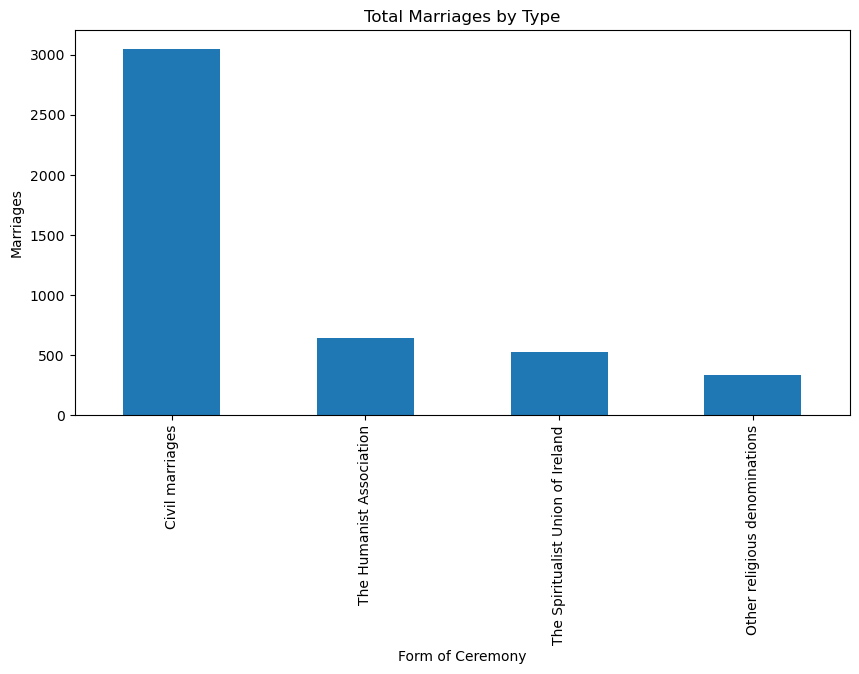

In [39]:
top_40_ceremonies = marriages_df.groupby('Form of Ceremony')['Total'].sum().nlargest(40)
top_40_ceremonies.plot(kind="bar", figsize=(10, 5))
plt.title("Total Marriages by Type")
plt.ylabel("Marriages")
plt.xlabel("Form of Ceremony")

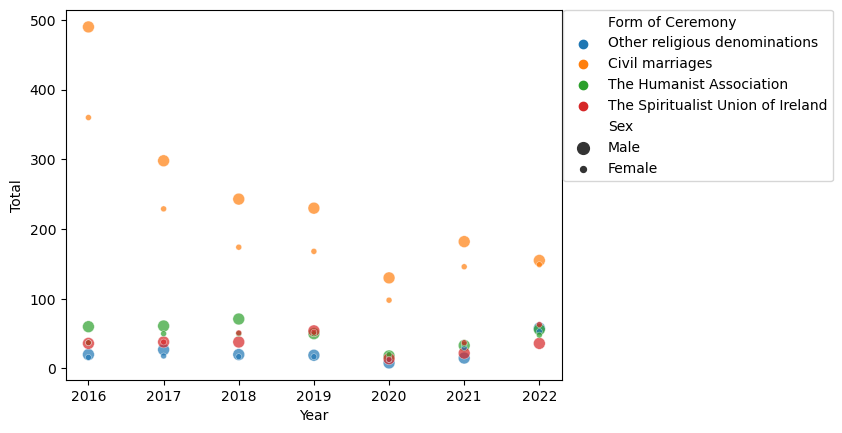

In [40]:

sns.scatterplot(data=marriages_df, x='Year', y='Total', hue='Form of Ceremony', size = 'Sex', alpha = 0.7)
plt.legend(loc='upper right',bbox_to_anchor=(1.56,1.02))

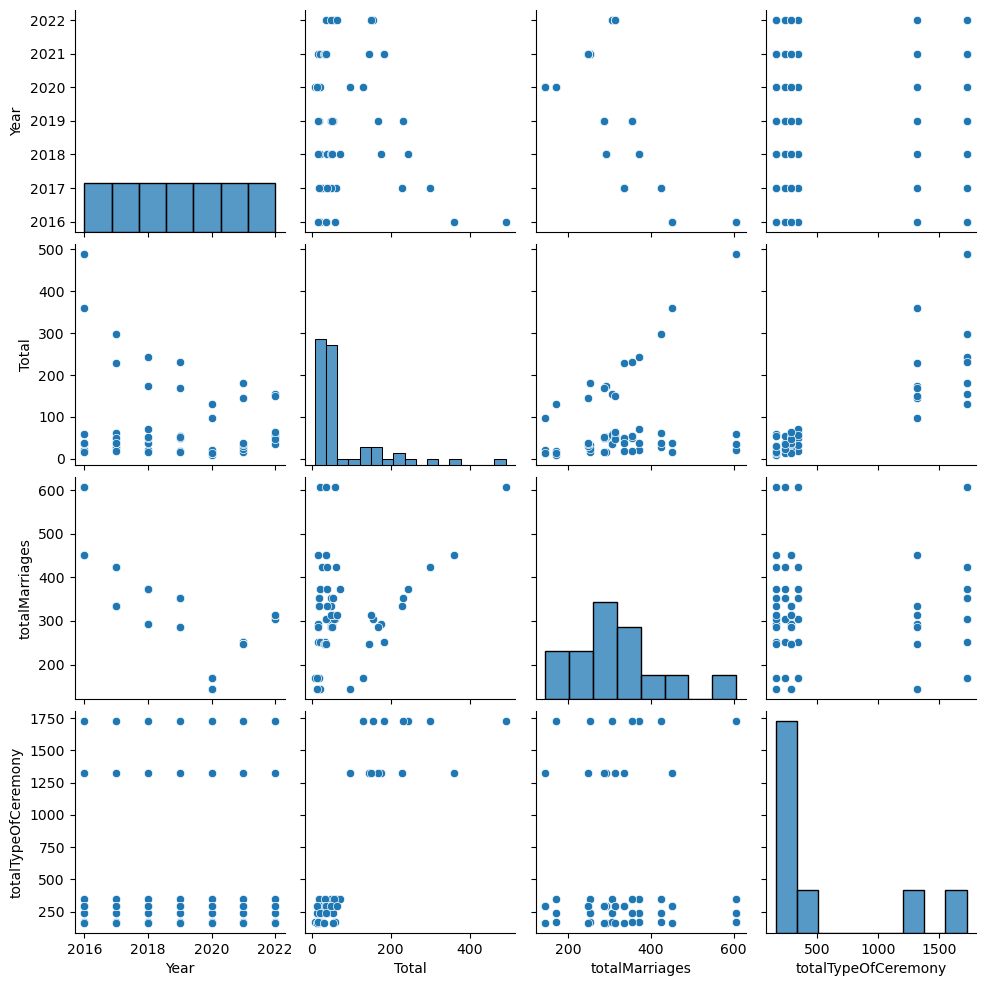

In [41]:
sns.pairplot(marriages_df);

In [42]:
marriages_df.to_csv('marriages_modified.csv', index=False)

In [43]:
isDone = False

while not isDone:
    option = input('Input the number of the category you want to get information from\n 1.-Total of Marriages 2.- Type of Marriages 3.- Marriages per sex 4.- Marriages per year: ')

    if option == 'done':
        isDone = True
        print('Thank you')
    else:
        try:
            option_to_int = int(option)
            if option_to_int == 1:
                total_marriages = marriages_df['Total'].sum()
                print('The total marriages for same sex couples are:', total_marriages)
            elif option_to_int == 2:
                option = input('Input the type of marriage you want info from\n 1.-Civil Marriage 2.-The Spiritualist Union of Ireland  3.- The Humanist Association\n 4.- Other religious denominations  5.-All types summary\n ')
                try:
                    option_to_int = int(option)  
                    if option_to_int == 1:
                        total_marriages_civil = marriages_df[marriages_df['Form of Ceremony'] == 'Civil marriages']['Total'].sum()
                        print('The total marriages for Civil Marriages are: ', total_marriages_civil)
                    elif option_to_int == 2:
                        total_marriages_spirit = marriages_df[marriages_df['Form of Ceremony'] == 'The Spiritualist Union of Ireland']['Total'].sum()
                        print('The total marriages for The Spiritualist Union of Ireland are: ', total_marriages_spirit)
                       
                    elif option_to_int == 3:
                        total_marriages_human = marriages_df[marriages_df['Form of Ceremony'] == 'The Humanist Association']['Total'].sum()
                        print('The total marriages for The Humanist Association are: ', total_marriages_human)
                        
                    elif option_to_int == 4:
                        total_marriages_other = marriages_df[marriages_df['Form of Ceremony'] == 'Other religious denominations']['Total'].sum()
                        print('The total marriages for Other religious denominations are: ', total_marriages_other)
                    
                    elif option_to_int == 5:
                        total_marriages_civil = marriages_df[marriages_df['Form of Ceremony'] == 'Civil marriages']['Total'].sum()
                        total_marriages_spirit = marriages_df[marriages_df['Form of Ceremony'] == 'The Spiritualist Union of Ireland']['Total'].sum()
                        total_marriages_human = marriages_df[marriages_df['Form of Ceremony'] == 'The Humanist Association']['Total'].sum()
                        total_marriages_other= marriages_df[marriages_df['Form of Ceremony'] == 'Other religious denominations']['Total'].sum()
                        
                        df_totals = pd.DataFrame({'Type': ['Civil Marriages', 'The Spiritualist Union of Ireland', 'The Humanist Association', 'Other religious denominations'],
                        'Total': [total_marriages_civil, total_marriages_spirit, total_marriages_human, total_marriages_other] })
            
                        print('Total of Ceremonies')
                        print(df_totals)
                       
                    else:
                        print('Input a number from the options.')
                except :
                    print('Input a valid number from the options')
            elif option_to_int == 3:
                
                option = input('Input the type of sex you want info from\n 1.-Male 2.-Female  3.- Both\n')
                try:
                    option_to_int = int(option)  
                    if option_to_int == 1:
                        total_marriages_male = marriages_df[marriages_df['Sex'] == 'Male']['Total'].sum()
                        print('The total marriages for Male is:', total_marriages_male)
                    elif option_to_int == 2:
                        total_marriages_female = marriages_df[marriages_df['Sex'] == 'Female']['Total'].sum()
                        print('The total marriages for Female is:', total_marriages_female)
                    elif option_to_int == 3:
            
                        total_marriages_male = marriages_df[marriages_df['Sex'] == 'Male']['Total'].sum()
                        total_marriages_female = marriages_df[marriages_df['Sex'] == 'Female']['Total'].sum()
                        df_totals = pd.DataFrame({'Sex': ['Male', 'Female'],
                        'Total': [total_marriages_male, total_marriages_female] })
            
                        print('Total of Ceremonies per Sex')
                        print(df_totals)
                       
                    else:
                        print('Input a number from the options.')
                except :
                    print('Input a valid number from the options')
            elif option_to_int == 4:
                
                option = input('Input the year you want info from\n 1.-2016 2.-2017 3.-2018 4.-2019 5.-2020 6-2021 7.-2022 8.-All years \n')
                try:
                    option_to_int = int(option)  
                    if option_to_int == 1:
                        total_marriages_2016 = marriages_df[marriages_df['Year'] == 2016]['Total'].sum()
                        print('The total marriages in 2016 is:', total_marriages_2016)
                    elif option_to_int == 2:
                        total_marriages_2017 = marriages_df[marriages_df['Year'] == 2017]['Total'].sum()
                        print('The total marriages in 2017 is:', total_marriages_2017)
                    elif option_to_int == 3:
                        total_marriages_2018 = marriages_df[marriages_df['Year'] == 2018]['Total'].sum()
                        print('The total marriages in 2018 is:', total_marriages_2018)
                    elif option_to_int == 4:
                        total_marriages_2019 = marriages_df[marriages_df['Year'] == 2019]['Total'].sum()
                        print('The total marriages in 2019 is:', total_marriages_2019)
                    elif option_to_int == 5:
                        total_marriages_2020 = marriages_df[marriages_df['Year'] == 2020]['Total'].sum()
                        print('The total marriages in 2020 is:', total_marriages_2020)
                    elif option_to_int == 6:
                        total_marriages_2021 = marriages_df[marriages_df['Year'] == 2021]['Total'].sum()
                        print('The total marriages in 2021 is:', total_marriages_2021)
                    elif option_to_int == 7:
                        total_marriages_2022 = marriages_df[marriages_df['Year'] == 2022]['Total'].sum()
                        print('The total marriages in 2022 is:', total_marriages_2022)                     
                    elif option_to_int == 8:
            
                        total_marriages_2016 = marriages_df[marriages_df['Year'] == 2016]['Total'].sum()
                        total_marriages_2017 = marriages_df[marriages_df['Year'] == 2017]['Total'].sum()
                        total_marriages_2018 = marriages_df[marriages_df['Year'] == 2018]['Total'].sum()
                        total_marriages_2019 = marriages_df[marriages_df['Year'] == 2019]['Total'].sum()
                        total_marriages_2020 = marriages_df[marriages_df['Year'] == 2020]['Total'].sum()
                        total_marriages_2021 = marriages_df[marriages_df['Year'] == 2021]['Total'].sum()
                        total_marriages_2022 = marriages_df[marriages_df['Year'] == 2022]['Total'].sum()
                        df_totals = pd.DataFrame({'Year': ['2016', '2017', '2018','2019','2020','2021','2022'],
                        'Total': [total_marriages_2016, total_marriages_2017, total_marriages_2018, total_marriages_2019,total_marriages_2020,total_marriages_2021,total_marriages_2022 ] })
            
                        print('All Years')
                        print(df_totals)
                       
                    else:
                        print('Input a number from the options.')
                except :
                    print('Input a valid number from the options')
                
            else:
                print('Input a valid number from the options')
        except :
            print("Input a valid number from the options or type 'done' to finalise.")

            

Input the number of the category you want to get information from
 1.-Total of Marriages 2.- Type of Marriages 3.- Marriages per sex 4.- Marriages per year: done
Thank you


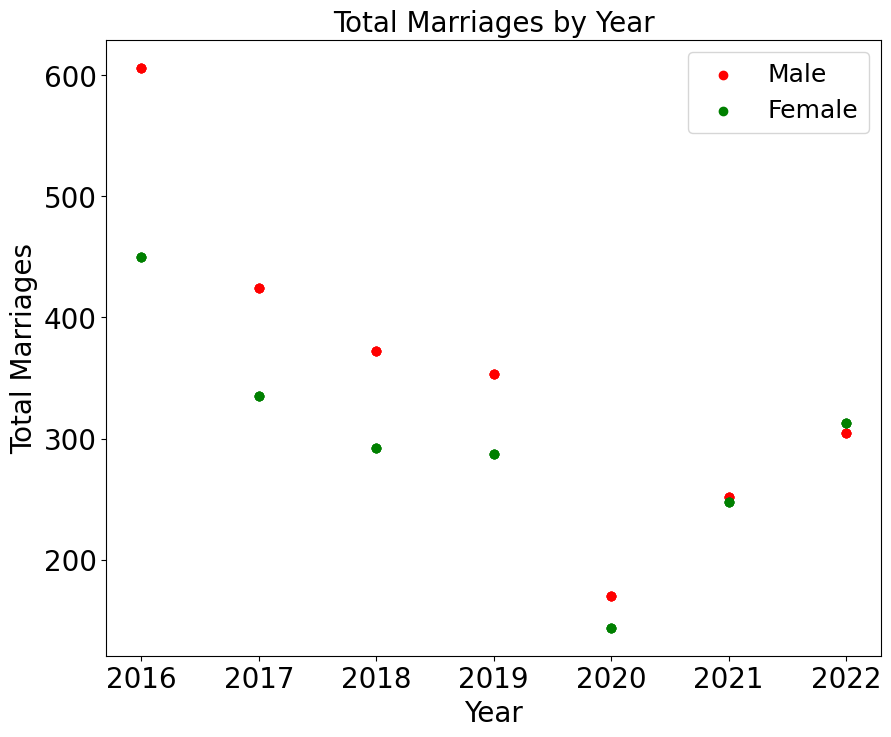

In [44]:


plt.figure(4, figsize=(10, 8)) 
plt.scatter(marriages_df[marriages_df['Sex'] == 'Male']['Year'], marriages_df[marriages_df['Sex'] == 'Male']['totalMarriages'], c='r', label='Male')


plt.scatter(marriages_df[marriages_df['Sex'] == 'Female']['Year'], marriages_df[marriages_df['Sex'] == 'Female']['totalMarriages'], c='g', label='Female')

plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Marriages', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Total Marriages by Year', fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

<Axes: >

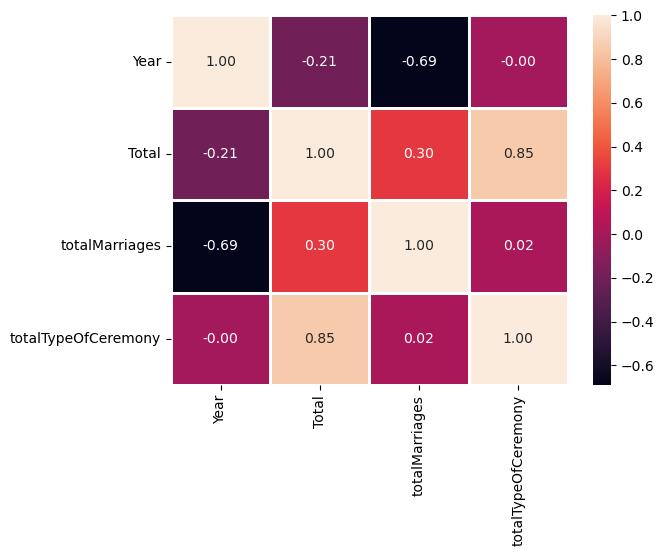

In [45]:
import warnings
warnings.filterwarnings('ignore') 
sns.heatmap(marriages_df.corr(), annot = True, fmt = '.2f', linewidths = 2)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [47]:
l_encoder = LabelEncoder()

marriages_df['Form of Ceremony'] = l_encoder.fit_transform(marriages_df['Form of Ceremony'])

In [48]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(marriages_df[['totalMarriages', 'totalTypeOfCeremony', 'Total']],marriages_df['Form of Ceremony'],test_size=0.2,random_state=42)

In [49]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((44, 3), (44,), (12, 3), (12,))

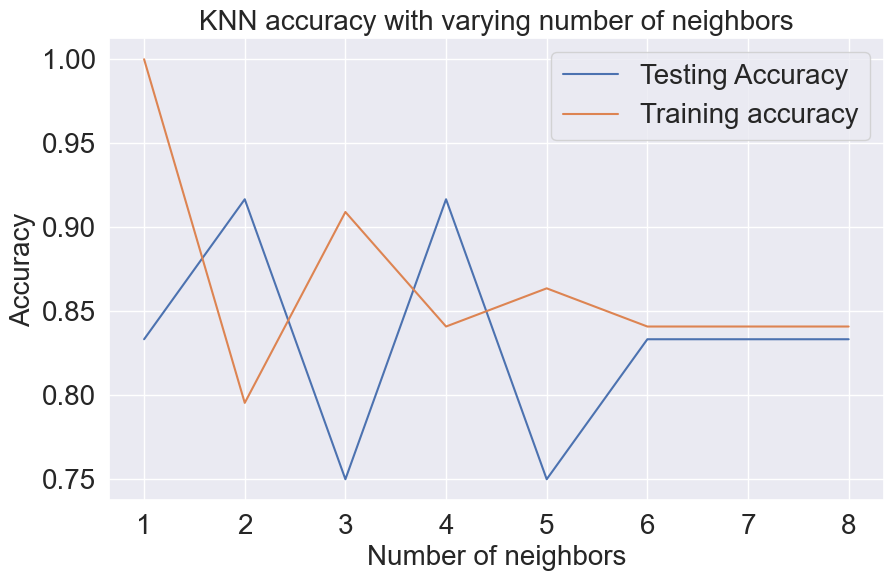

In [151]:
neighbors = np.arange(1, 9)                  
train_accuracy = np.zeros(len(neighbors))    
test_accuracy = np.zeros(len(neighbors))     

for i,k in enumerate(neighbors):                          
    knn = KNeighborsClassifier(n_neighbors = k)           

    
    knn.fit(train_data, train_label)                      
    train_accuracy[i] = knn.score(train_data, train_label)      
    test_accuracy[i] = knn.score(test_data, test_label)      
    
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [51]:

knn = KNeighborsClassifier(n_neighbors = 3)


knn.fit(train_data, train_label)


train_accuracy = knn.score(train_data, train_label)

test_accuracy = knn.score(test_data, test_label)

In [52]:
print(test_accuracy)


0.75


In [53]:
from sklearn.metrics import confusion_matrix


prediction = knn.predict(test_data)


confusion_matrix(test_label, prediction)

array([[3, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 1, 2],
       [0, 0, 1, 1]])

In [54]:
from sklearn.metrics import classification_report


print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.50      0.33      0.40         3
           3       0.33      0.50      0.40         2

    accuracy                           0.75        12
   macro avg       0.71      0.71      0.70        12
weighted avg       0.76      0.75      0.75        12



In [55]:


X = marriages_df[['totalMarriages', 'totalTypeOfCeremony', 'Total']].values
y = marriages_df['Form of Ceremony'].values

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      0.67      0.80         3
           3       0.67      1.00      0.80         2

    accuracy                           0.92        12
   macro avg       0.92      0.92      0.90        12
weighted avg       0.94      0.92      0.92        12



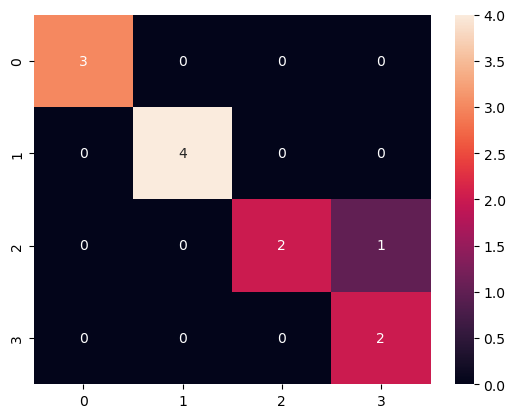

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot = True)


print(classification_report(y_test, y_pred))

In [59]:
from sklearn import metrics                           
import warnings
warnings.filterwarnings('ignore') 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


[Text(0.6, 0.875, 'x[1] <= 836.5\ngini = 0.749\nsamples = 44\nvalue = [11, 10, 11, 12]'),
 Text(0.4, 0.625, 'x[1] <= 202.5\ngini = 0.665\nsamples = 33\nvalue = [0, 10, 11, 12]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]'),
 Text(0.6, 0.375, 'x[1] <= 320.0\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12]'),
 Text(0.4, 0.125, 'gini = 0.444\nsamples = 18\nvalue = [0, 0, 6, 12]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0, 0]')]

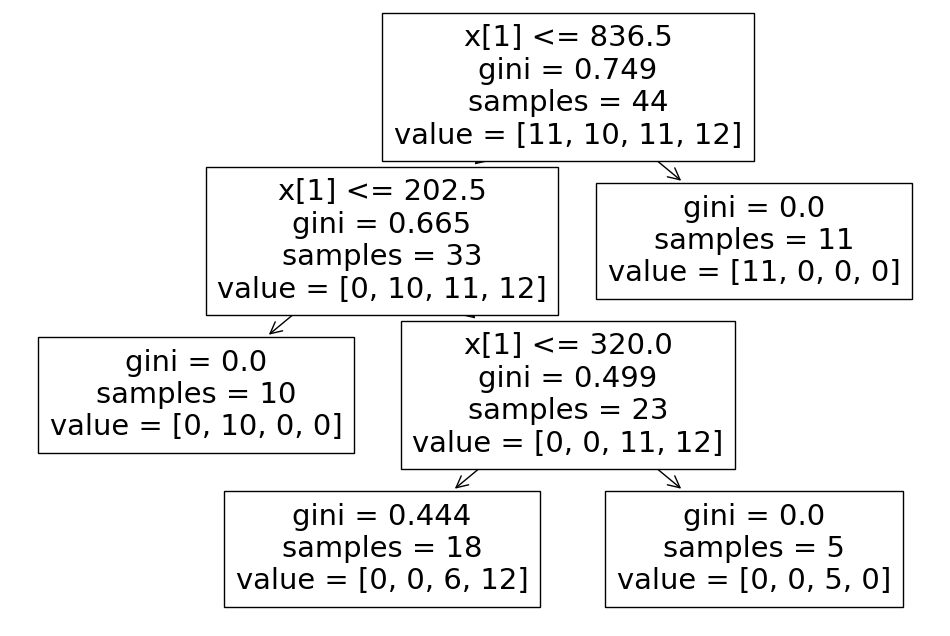

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

In [67]:
marriages_df.head(2)

,Year,Sex,Form of Ceremony,Total,totalMarriages,totalTypeOfCeremony
101,2016,Male,1,20.0,606,167
102,2016,Male,0,490.0,606,1728


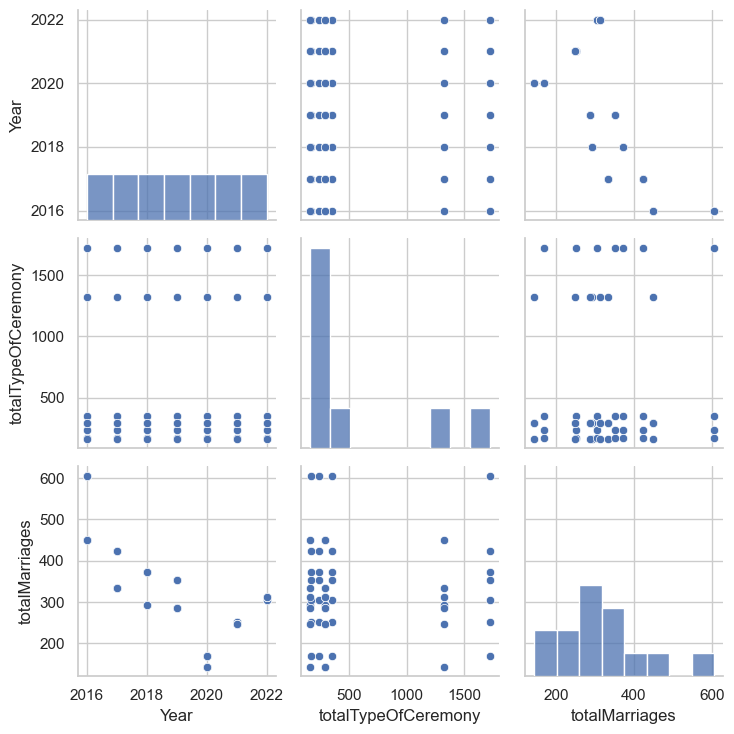

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', context='notebook')


cols = [ 'Year','totalTypeOfCeremony', 'totalMarriages']


sns.pairplot(marriages_df[cols], height = 2.5)

plt.tight_layout()

plt.show()

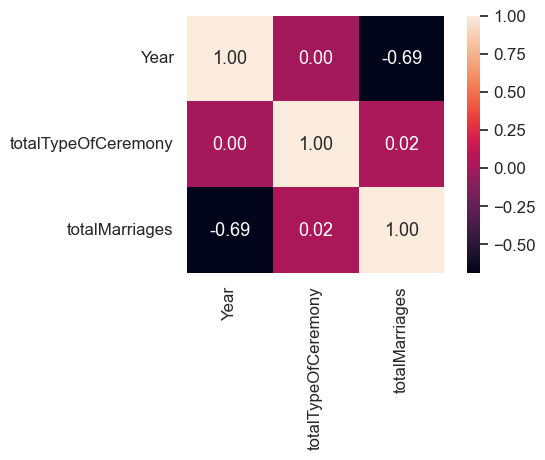

In [74]:


cm = np.corrcoef(marriages_df[cols].values.T)


sns.set(font_scale = 1.1)

hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 13},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()

plt.show()

In [99]:
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [139]:
X = marriages_df[['Year']].values
y = marriages_df[['totalMarriages']].values

In [140]:
X.shape, y.shape

((56, 1), (56, 1))

In [141]:
# Import the library for normalization of the data
from sklearn.preprocessing import StandardScaler

# Initialise the objects using StandardScaler() 
sc_x = StandardScaler()
sc_y = StandardScaler()

# Train the objects using fit_transform()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [142]:
y_std = np.reshape(y_std, 56)

# Display the number of rows and columns
X_std.shape, y_std.shape

((56, 1), (56,))

In [143]:
lr = LinearRegressionGD()

# Train the model by calling fit() mentiof
lr.fit(X_std, y_std)

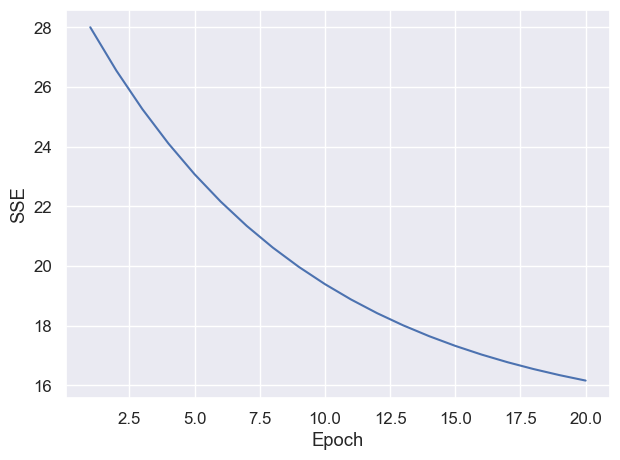

In [144]:
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')           # SSE means 'sum of squares error'
plt.xlabel('Epoch')         # The number of epochs is a hyperparameter that defines the number times 
                            # that the learning algorithm will work through the entire training 
                            # dataset. One epoch means that each sample in the training dataset has 
                            # had an opportunity to update the internal model parameters. 
                            # An epoch is comprised of one or more batches.
plt.tight_layout()

plt.show()

In [145]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

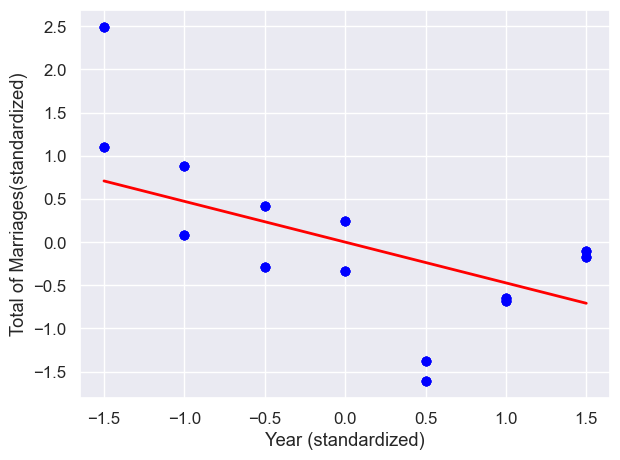

In [147]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Year (standardized)')
plt.ylabel('Total of Marriages(standardized)')
plt.tight_layout()

plt.show()

In [148]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: -0.472
Intercept: 0.000


In [149]:
year_std = sc_x.transform([[5.0]])

total_marriages_std = lr.predict(year_std)


total_marriages_2d = total_marriages_std.reshape(-1,1)
print("Predicted Marriages: %.3f" % sc_y.inverse_transform(total_marriages_2d))

Predicted Marriages: 54015.447


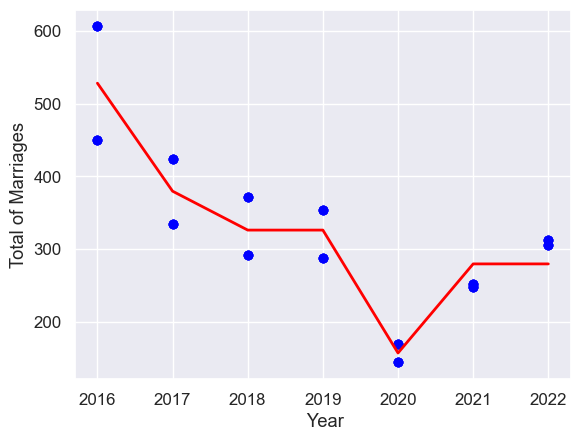

In [150]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

# Store the feature or attribute values in X and y
X = marriages_df[['Year']].values
y = marriages_df['totalMarriages'].values

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel(' Year')
plt.ylabel('Total of Marriages')
# plt.savefig('./figures/tree_regression.png', dpi = 300)
plt.show()

In [152]:
!pip install PCA

In [154]:
# PCA for Machine Learning Model


In [202]:
df = marriages_df[['Year', 'totalMarriages','Total', 'totalTypeOfCeremony']]  

df.head()

,Year,totalMarriages,Total,totalTypeOfCeremony
101,2016,606,20.0,167
102,2016,606,490.0,1728
103,2016,606,60.0,349
104,2016,606,36.0,238
106,2016,450,16.0,164


In [203]:
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  

scalar.fit(df)
scaled_data = scalar.transform(df)
  

from sklearn.decomposition import PCA
  

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(56, 2)

Text(0, 0.5, 'Second Principal Component')

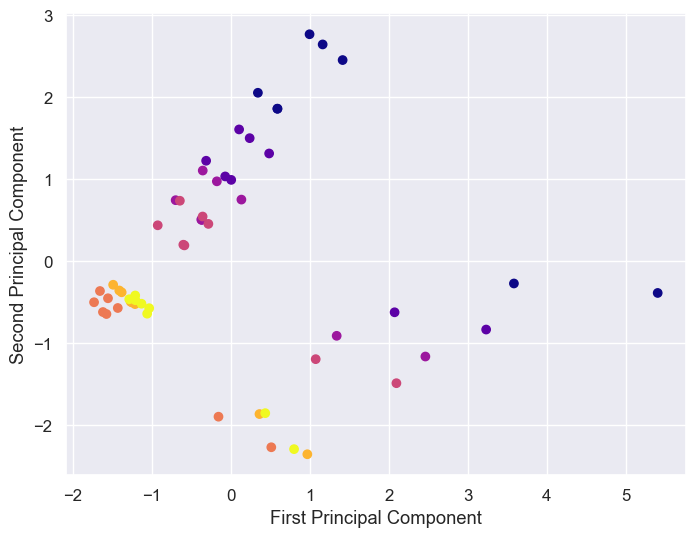

In [204]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=marriages_df['Year'], cmap='plasma')


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [205]:
pca.components_, pca.explained_variance_ratio_

(array([[-0.41392166,  0.45298585,  0.61039908,  0.50088486],
        [-0.56621847,  0.52978406, -0.34103765, -0.53143092]]),
 array([0.51446109, 0.38047271]))

<Axes: >

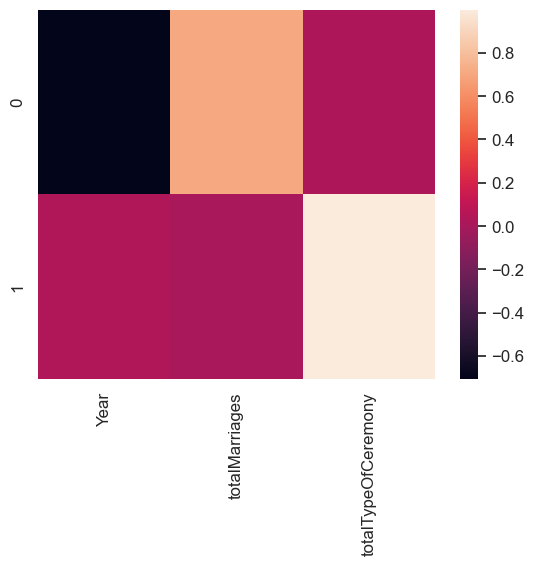

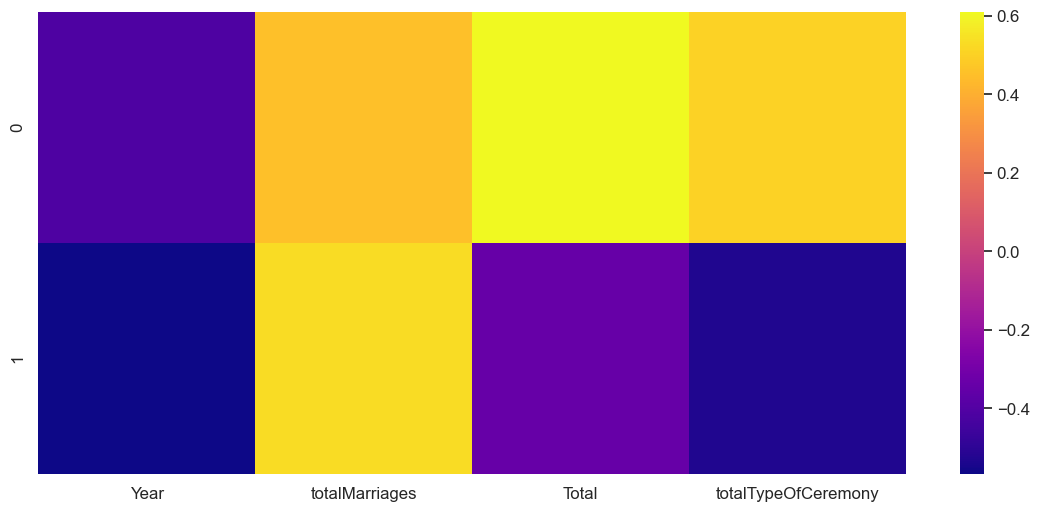

In [206]:
sns.heatmap(df_comp)

df_comp = pd.DataFrame(pca.components_, columns=df.columns)
plt.figure(figsize=(14, 6))
sns.heatmap(df_comp, cmap='plasma')

In [277]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(random_state = 1)


kmeans = KMeans(n_clusters = 3)
kmeans.fit(marriages_df[['totalMarriages', 'Total']])

KMeans(n_clusters=3)

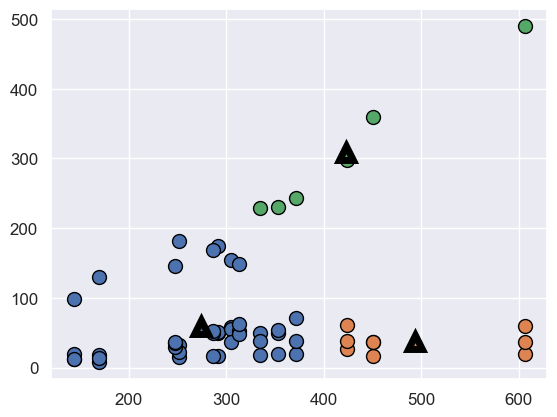

In [278]:
import mglearn


mglearn.discrete_scatter(marriages_df['totalMarriages'], marriages_df['Total'], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    [0, 1,2], markers='^', markeredgewidth=5)

plt.show()

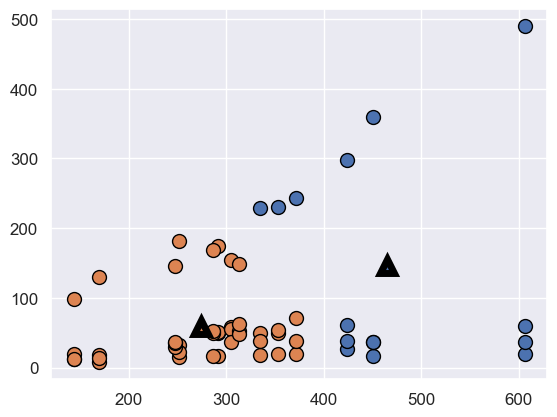

In [275]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(marriages_df[['totalMarriages', 'Total']])
mglearn.discrete_scatter(marriages_df['totalMarriages'], marriages_df['Total'], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    [0, 1], markers='^', markeredgewidth=5)

plt.show()

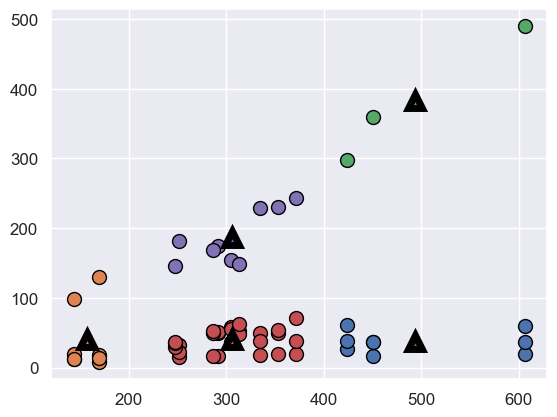

In [279]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(marriages_df[['totalMarriages', 'Total']])
mglearn.discrete_scatter(marriages_df['totalMarriages'], marriages_df['Total'], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    [0, 1,2,3,4], markers='^', markeredgewidth=5)

plt.show()